###  Wir machen uns eine Liste mit allen unseren Hirnbildern

In [1]:
import os

In [2]:
imgList = ['../test/%s'%x for x in os.listdir('../test/')]
imgList = [x for x in imgList if x.split('/')[-1].startswith('s00')]
imgList.sort()

### Whole-Brain Maske

Hier benutzen wir eine grobe Maske mit 4mm Auflösung, weil die Berechnungen sonst zu lange dauern

In [3]:
from nilearn import image, plotting, input_data 

In [4]:
import pickle

In [5]:
my_masker = input_data.NiftiMasker(mask_img='../masks/gmMap4mm.nii.gz').fit()

In [6]:
my_masker

NiftiMasker(detrend=False, high_pass=None, low_pass=None, mask_args=None,
      mask_img='../masks/gmMap4mm.nii.gz', mask_strategy='background',
      memory=Memory(cachedir=None), memory_level=1, sample_mask=None,
      sessions=None, smoothing_fwhm=None, standardize=False, t_r=None,
      target_affine=None, target_shape=None, verbose=0)

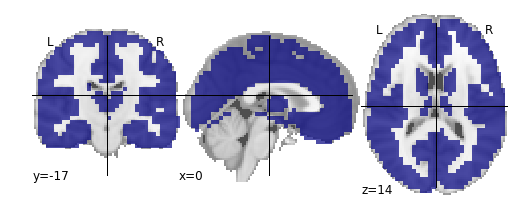

In [7]:
plotting.plot_roi(my_masker.mask_img_);

### Daten extrahieren

In [8]:
from sklearn import preprocessing

In [9]:
def extractMaps(fileName,my_masker):
    thisData = my_masker.transform(fileName)[-1]
    scaleData = preprocessing.scale(thisData)
    return scaleData

Um das Ganze erstmal beispielhaft durchzugehen, nehmen wir uns einen einzelnen Block aus unseren Daten

In [10]:
thisMap = imgList[-19]

In [11]:
scaleMap = extractMaps(thisMap,my_masker)

/data/martin/seminarSS18/venv/lib/python2.7/site-packages/scipy/ndimage/interpolation.py:435: UserWarning: The behaviour of affine_transform with a one-dimensional array supplied for the matrix parameter will change in scipy 0.18.0.
  "The behaviour of affine_transform with a one-dimensional "


In [12]:
scaleMap

array([-2.0746827 , -2.95437845, -1.09962668, ...,  1.25461633,
       -0.98605727, -0.86549965])

### wir laden ca. 600 Karten aus Neurosynth, die ich vorher ausgewählt habe  

Die Einschlusskriterien waren, dass die Maske nicht leer sein darf (Stichwörter wie "magnetic" sind so unspefifisch, dass sie keine Voxel enthalten; außerdem gibt es sehr viele Karten, die zwar Voxel enthalten, aber keinem inhaltlich interpertierbaren psychologischen Prozess zugeordnet werden können (z.B. white matter, young, old, patient, healthy).

In [13]:
import pandas as pd

In [14]:
nsData = pd.read_csv('../arrays/ns_4mm_database.csv',index_col=[0,1])

In [15]:
nsData

0         1         2         3         4  \
  Unnamed: 1                                                                  
0 angular                 -0.112818 -0.112818 -0.112818 -0.112818 -0.112818   
  angular gyrus           -0.118733 -0.118733 -0.118733 -0.118733 -0.118733   
  anterior medial         -0.096995 -0.096995 -0.096995 -0.096995 -0.096995   
  autobiographical        -0.308027 -0.308027 -0.308027 -0.308027 -0.308027   
  autobiographical memory -0.255477 -0.255477 -0.255477 -0.255477 -0.255477   
  belief                  -0.121477 -0.121477 -0.121477 -0.121477 -0.121477   
  beliefs                 -0.179680 -0.179680 -0.179680 -0.179680 -0.179680   
  cognitive task          -0.084713 -0.084713 -0.084713 -0.084713 -0.084713   
  coherent                -0.094727 -0.094727 -0.094727 -0.094727 -0.094727   
  component               -0.030105 -0.030105 -0.030105 -0.030105 -0.030105   
  component ica           -0.146041 -0.146041 -0.146041 -0.146041 -0.146041   
  connectivity            -0.108641 -0.108641 -0.108641 -0.108641 -0.108641   
  connectivity networks   -0.148103 -0.148103 -0.148103 -0.148103 -0.148103   
  construction            -0.142752 -0.142752 -0.142752 -0.142752 -0.142752   
  cortex mpfc             -0.165563 -0.165563 -0.165563 -0.165563 -0.165563   
  cortex pcc              -0.110599 -0.110599 -0.110599 -0.110599 -0.110599   
  cortex posterior        -0.120295 -0.120295 -0.120295 -0.120295 -0.120295   
  cortex precuneus        -0.160598 -0.160598 -0.160598 -0.160598 -0.160598   
  cortex vmpfc            -0.135151 -0.135151 -0.135151 -0.135151 -0.135151   
  deactivation            -0.154391 -0.154391 -0.154391 -0.154391 -0.154391   
  default                 -0.268923 -0.268923 -0.268923 -0.268923 -0.268923   
  default mode            -0.227627 -0.227627 -0.227627 -0.227627 -0.227627   
  default network         -0.217868 -0.217868 -0.217868 -0.217868 -0.217868   
  dmn                     -0.167034 -0.167034 -0.167034 -0.167034 -0.167034   
  dorsal attention        -0.100275 -0.100275 -0.100275 -0.100275 -0.100275   
  dorsomedial             -0.108129 -0.108129 -0.108129 -0.108129 -0.108129   
  dorsomedial prefrontal  -0.142136 -0.142136 -0.142136 -0.142136 -0.142136   
  episodic                -0.301263 -0.301263 -0.301263 -0.301263 -0.301263   
  episodic memory         -0.250077 -0.250077 -0.250077 -0.250077 -0.250077   
  functional connectivity -0.138237 -0.138237 -0.138237 -0.138237 -0.138237   
...                             ...       ...       ...       ...       ...   
7 opercularis             -0.070529 -0.070529 -0.070529 -0.070529 -0.070529   
  orthographic            -0.198586 -0.198586 -0.198586 -0.198586 -0.198586   
  pairs                   -0.069705 -0.069705 -0.069705 -0.069705 -0.069705   
  pars                    -0.067385 -0.067385 -0.067385 -0.067385 -0.067385   
  pars opercularis        -0.070529 -0.070529 -0.070529 -0.070529 -0.070529   
  phonological            -0.287132 -0.287132 -0.287132 -0.287132 -0.287132   
  posterior inferior      -0.093829 -0.093829 -0.093829 -0.093829 -0.093829   
  posterior middle        -0.129101 -0.129101 -0.129101 -0.129101 -0.129101   
  posterior temporal       7.723568 -0.142686 -0.142686 -0.142686  7.557156   
  pseudowords             -0.128868 -0.128868 -0.128868 -0.128868 -0.128868   
  read                    -0.112065 -0.112065 -0.112065 -0.112065 -0.112065   
  readers                 -0.135372 -0.135372 -0.135372 -0.135372 -0.135372   
  reading                 -0.256289 -0.256289 -0.256289 -0.256289 -0.256289   
  representations         -0.047898 -0.047898 -0.047898 -0.047898 -0.047898   
  semantic                -0.294634 -0.294634 -0.294634  3.630281  3.690962   
  semantic information    -0.071968 -0.071968 -0.071968 -0.071968 -0.071968   
  semantically            -0.092958 -0.092958 -0.092958 -0.092958 -0.092958   
  semantics               -0.079119 -0.079119 -0.079119 -0.079119 -0.079119   
  sen

Die Daten wurden mittels Clusteranalyse in 8 verschiedene Cluster eingeteilt, denen wir erstmal keine Namen geben; das können Sie selbst einmal machen, indem Sie sich erstmal die Ergebnisse des "Brain Space Balls" unten ansehen, dann die Werte hier ändern und dann alles ab hier noch mal ausführen.

In [16]:
clusterNames =  pickle.load( open( "../pickels/clusterDict.p", "rb" ) )

In [17]:
clusterNames

{'0': 'default',
 '1': 'motor',
 '2': 'reward',
 '3': 'auditory',
 '4': 'emotion',
 '5': 'spatial',
 '6': 'objects',
 '7': 'language'}

## Korrelation eines Blocks unserer Daten mit allen 602 Karten

In [18]:
import numpy as np

In [19]:
thisCorr = np.corrcoef(scaleMap,nsData)[0,:][1:]

In [20]:
thisCorrDf = pd.DataFrame(thisCorr,index=nsData.index,columns=['corr']).T

In [21]:
thisCorrDf

0                                                 \
Unnamed: 1   angular angular gyrus anterior medial autobiographical   
corr       -0.006464      -0.00697        0.016121        -0.010508   

                                                                       \
Unnamed: 1 autobiographical memory    belief   beliefs cognitive task   
corr                     -0.007834 -0.023944 -0.025714      -0.009468   

                                 ...            7                      \
Unnamed: 1  coherent component   ...    sentences  speakers syntactic   
corr       -0.013652 -0.005475   ...    -0.024115 -0.006006 -0.005063   

                                                                              \
Unnamed: 1 temporal cortex      verb    verbal     verbs      word     words   
corr              0.016022  0.003793 -0.028057  0.001747 -0.006068 -0.007084   

                     
Unnamed: 1  written  
corr        0.00632  

[1 rows x 602 columns]

### Wir sortieren nach Stärke der Korrelation

Sonst müssten wir die 602 Korrelationen einzeln durchgehen um bedeutsame Zusammenhänge zu finden.

In [22]:
def getTop(corrDf):
    sortDf = corrDf.copy()
    sortDf = sortDf.T.sort_values(by=sortDf.index[-1],ascending=False)
    topDf = pd.concat([sortDf[:5],sortDf[-5:]],axis=0)
    topDf.columns = ['correlation']
    topDf = topDf.round(2)
    return topDf

In [23]:
topDf = getTop(thisCorrDf)

Beispiel: Die fünf höchstn und die fünf niedrigsten Korrelationen des gewählten Blocks

In [24]:
topDf

correlation
  Unnamed: 1                
6 visual                0.08
4 pictures              0.06
6 occipito              0.06
4 disgust               0.06
2 striatal              0.06
0 default mode         -0.05
3 auditory             -0.05
0 resting state        -0.05
  mode network         -0.05
  component ica        -0.05

Auflösung: was war unser Block?

In [25]:
thisMap

'../test/s00num021.nii.gz'

## Die 602 Karten in Neurosynth nach Ähnlichkeit gruppieren

Wir haben gesagt, dass die 602 Karten in Cluster eingeteilt sind. Können wir das irgendwie darstellen? Ja, indem wir die 18744 Dimensionen (jeder Voxel ist eine Dimension) auf 2 Dimensionen projizieren. Dazu verwenden wir [Multidimensionale Skalierung](http://scikit-learn.org/stable/modules/manifold.html).

In [26]:
# hier verwenden wir Daten die ich vorbereitet habe
dissDf = pd.read_csv('../arrays/dissDf.csv',index_col=[0])
mdsPositions = np.array(pd.read_csv('../arrays/mdsDf.csv',index_col=[0]))
mdsDf = pd.DataFrame(mdsPositions,index=dissDf.index)

In [27]:
# plotting
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
%matplotlib inline

Acht Fraben für die acht Cluster:

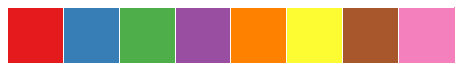

In [28]:
myPalette = sns.color_palette('Set1',n_colors=8)
sns.palplot(myPalette)

## Brain Space

In [29]:
# laden von vorbereiteten Sachen
mdsDf = pd.read_csv('../arrays/mdsDf.csv',index_col=[0])
kDf = pd.read_csv('../arrays/kDf.csv',index_col=[0])

Abbildung erstellen

In [30]:
def findNeighbors(mdsDf,p,added,notCloserThan=50):
    
    # coordinates of this keyword
    thisDf = mdsDf.loc[p]
    
    # coordinates of all other keywords
    otherDf = mdsDf.drop(p)
    
    # lenghts of adjacent and opposite
    diffDf = abs(thisDf-otherDf)
    
    # lengths of hypoteneuse
    distanceDf = np.sqrt(diffDf**2).sum(axis=1)
    
    # check if there are close distances
    closeEncounters = distanceDf[distanceDf<notCloserThan].index
    
    # check if the close ones have already been labelled
    for entry in closeEncounters:
        if entry in added:
            return True
    
    return False

In [31]:
def plotSpace(mdsDf,kDf,clusterNames,myPalette,closest,ax):

    kPredictions = list(kDf['n'])
    # loop both trough the positions and the predictions
    for p,l in zip(mdsDf.index,kPredictions):
        # show predictions from raw data on mds scaled data, the predictions are indicated by the color
        ax.plot( mdsDf.ix[p]['0'],
                     mdsDf.ix[p]['1'],
                     'o',color=myPalette[l],
                      markersize=12,alpha=0.8
               )

    added = []
    mdsDf = mdsDf.sort_values(by='1')
    # sorting by the x-dimension will fill the labels from right to left side
    mdsDf = mdsDf.sort_values(by='0',ascending=False)
    for p,x,y in zip(mdsDf.index,mdsDf['0'], mdsDf['1']):
        l = kDf.loc[p]
        if not findNeighbors(mdsDf,p,added,notCloserThan=closest):
            ax.annotate(p, xy = (x, y),fontsize=16,alpha=0.8)
            added.append(p)
            
    # dummy plot for labelling
    for l in np.unique(kDf['n']):
        ax.plot([],'o',color=myPalette[l],label=clusterNames[str(l)])
    
    # show the plot
    sns.despine(left=True,bottom=True)
    ax.set_xticks([]);ax.set_yticks([])
    ax.legend(loc='lower left',bbox_to_anchor=(0.,0))
    return ax

Einstellungen für Abbildung

In [32]:
sns.set_style('white')
sns.set_context('poster')

### der große Ball

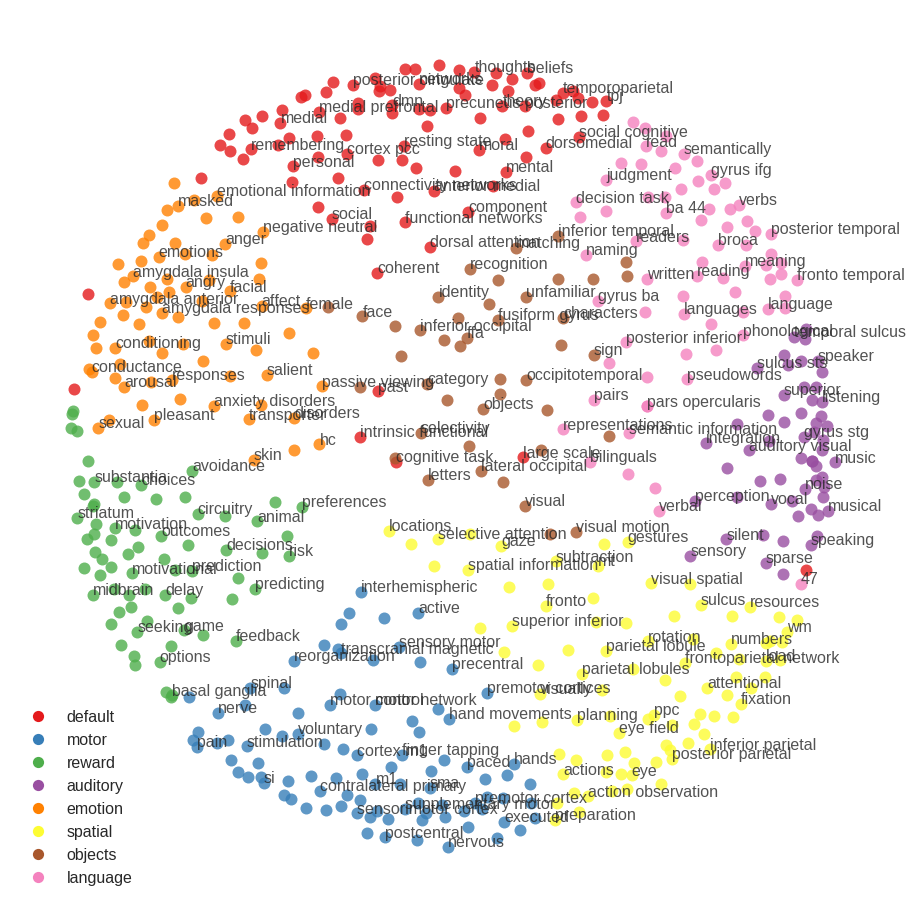

In [33]:
fig,ax = plt.subplots(1,1,figsize=(16,16))
ax = plotSpace(mdsDf,kDf,clusterNames,myPalette,50,ax)
plt.show()

Was ist das? Jede der 602 Karten in Neurosynth wurde mit jeder anderen korreliert. Das gibt 602x602=362404 Korrelationen.  
Wir machen aus den Korrelationen Distanzen, indem wir 1-Korrelation rechnen. Perfekte Korrelationen von 1 haben eine Distanz von 0 und negative Korrelationen von -1 haben eine Distanz von 2. Alle anderen liegen dazwischen. Dann nehmen wir diese Distanzen im 18744-Dimensionalen Raum (jeder Voxel ist eine Dimension) und projizieren sie auf 2. Dabei geht zwar viel Information verloren, aber weniger als man denken würde. Da wir außerdem eine Clusteranalyse im 18744-Dimnesionalen Raum gerechnet haben, können wir jedem Punkt auf der Karte eine Farbe geben, die anzeigt, zu welchem Cluster der Punkt gehört. Dabei sehen wir, dass die Cluster ganz gut in 2D dargestellt werden können.  

Was sagt uns das? Je näher sich zwei Punkte sind, desto ähnlicher sind sich die Aktivierungsmuster für das jeweilige Stichwort in Neurosynth. Für sich genommen ist schon interessant, wie gut inhaltlich/psychologisch interpretierbar diese Ähnlichkeiten sind.

## der Ball - Teil 2

Jetzt haben wir zwar alle Karten in Neurosynth miteinander korreliert, aber unsere eigenen Daten aber gar nicht verwendet um den Ball zu erstellen. Dabei hatten wir doch oben eine Tabelle mit Korrelationen. Um diese jetzt auf dem Ball darzustellen, variieren wir die Größe der Punkte. Je höher die Korrelation unserer Karte mit einem Punkt (z.B. "face", "lexical" etc.), desto größer wird der Punkt. 

Dabei schummeln wir, indem wir die Größe exponentiell variieren. D.h. die Unterschiede in unserem Ball sehen viel viel größer aus als sie tatsächlich sind. Das ist aber der einzige Weg, dass das resultierende Bild dann noch halbwegs übersichtlich und lesbar ist. Außerdem simuliert das auch in gewisser Weise einen "winner take all" Algorithmus.

In [34]:
# Skalierung der Korrelationen von 0 bis 1
def makeMinMax(corrDf):
    minMaxDf = pd.DataFrame( preprocessing.minmax_scale(corrDf,axis=1),
                            index=corrDf.index,
                            columns=corrDf.columns )
    return minMaxDf.T

In [35]:
minMaxDf = makeMinMax(thisCorrDf)

Abbildung machen

In [36]:
def plotCorr(mdsDf,kDf,minMaxDf,myPalette,clusterNames,closest,ax):

    # loop both trough the positions and the predictions
    for p in mdsDf.index:
        l = kDf['n'].loc[p]
        # show predictions from raw data on mds scaled data, the predictions are indicated by the color
        ax.plot( mdsDf.ix[p]['0'],
                     mdsDf.ix[p]['1'],
                     'o',color=myPalette[l],
                      markersize=minMaxDf.ix[l].ix[p]**3*50,
                      alpha=0.7
               )

    # to not omit the most important keywords, we move through the list by the order in minMaxDf
    sortedIndex = minMaxDf.sort_values('corr',ascending=False).index.labels[1]
    sortedNames = [minMaxDf.index.levels[1][x] for x in sortedIndex ]
    #print sortedNames[:10]
    added = []
    for p in sortedNames:
        l = kDf['n'].loc[p]
        x = mdsDf['0'].loc[p]
        y = mdsDf['1'].loc[p]

        if not findNeighbors(mdsDf,p,added,notCloserThan=closest):

            thisVal = minMaxDf.ix[l].ix[p].values[-1]
            
            ax.annotate(p, xy = (x, y),
                    fontsize=thisVal**3*50,
                    alpha=thisVal**5)
            added.append(p)

    # dummy plot for labelling
    for l in np.unique(kDf['n']):
        ax.plot([],'o',color=myPalette[l],label=clusterNames[str(l)])
    
    # show the plot
    sns.despine(left=True,bottom=True)
    ax.set_xticks([]);ax.set_yticks([])
    #ax.legend(loc='lower left',bbox_to_anchor=(1.5,0))
    return ax

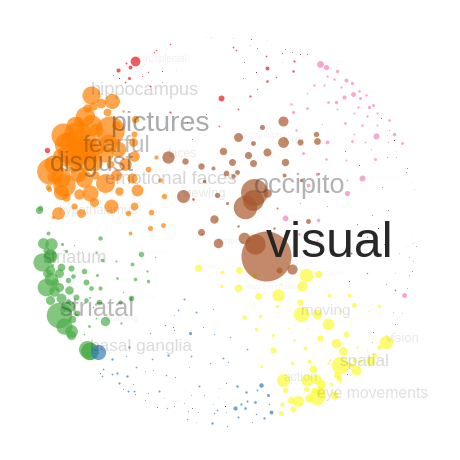

In [37]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
plotCorr(mdsDf,kDf,minMaxDf,myPalette,clusterNames,100,ax)
plt.show()

## Sanity Checks

In [38]:
def makeMindSpace(thisMap,
                  my_masker=my_masker,nsData=nsData,mdsDf=mdsDf,kDf=kDf,
                  myPalette=myPalette,clusterNames=clusterNames):

    scaleMap = extractMaps(thisMap,my_masker)

    thisCorr = np.corrcoef(scaleMap,nsData)[0,:][1:]
    
    thisCorrDf = pd.DataFrame(thisCorr,index=nsData.index,columns=['corr']).T
    
    minMaxDf = makeMinMax(thisCorrDf)

    fig,ax = plt.subplots(1,1,figsize=(8,8))
    
    plotCorr(mdsDf,kDf,minMaxDf,myPalette,clusterNames,50,ax)
    
    imgName = thisMap.split('/')[-1].split('.')[0]
    
    plt.title(imgName)
    
    plt.show()

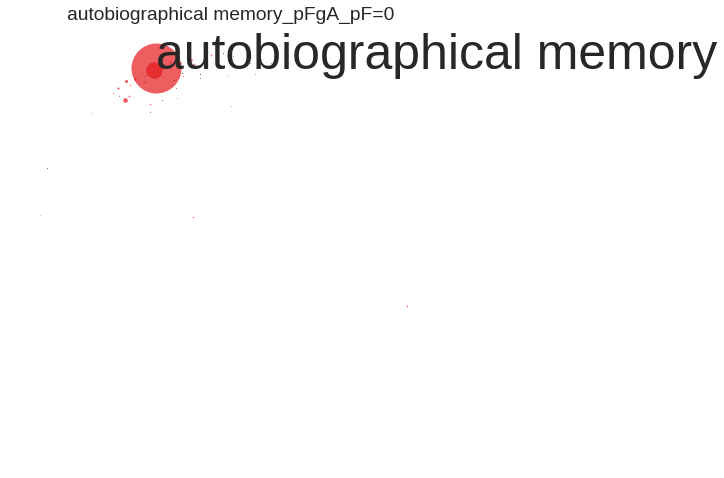

In [39]:
makeMindSpace('../ns/autobiographical memory_pFgA_pF=0.50_FDR_0.01.nii.gz')

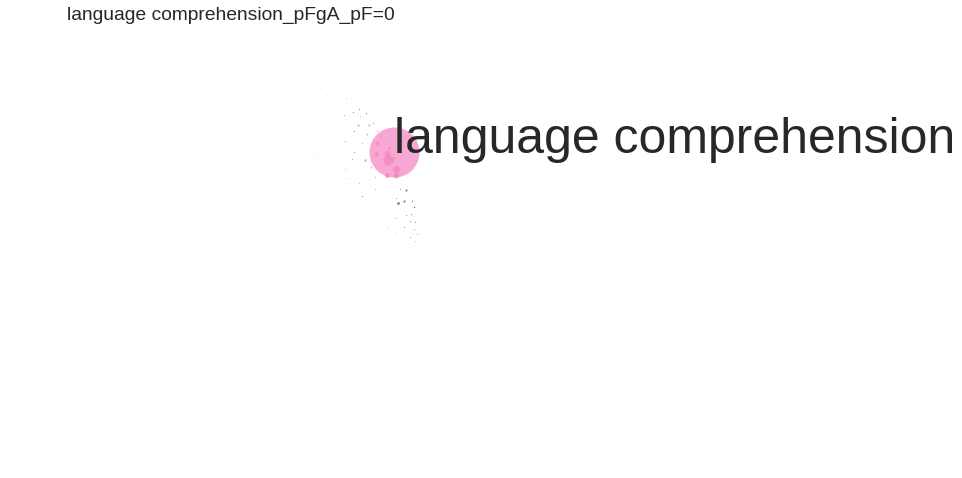

In [40]:
makeMindSpace('../ns/language comprehension_pFgA_pF=0.50_FDR_0.01.nii.gz')

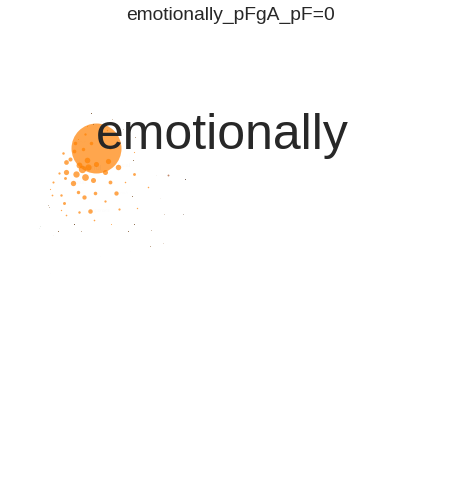

In [41]:
makeMindSpace('../ns/emotionally_pFgA_pF=0.50_FDR_0.01.nii.gz')

## Das machen wir jetzt für alle 50 unserer Blöcke

In [42]:
def sortBlocks(blocks):
    d = {}
    for i in blocks:
        num = i.split('/')[-1].split('.')[0]
        d[num] = i
    sortRunDf = pd.DataFrame(d,index=['filename']).T
    sortRunDf.sort_index(inplace=True)
    return sortRunDf

In [43]:
sortRunDf = sortBlocks(imgList)

In [44]:
sortRunDf

filename
s00SECRETstart  ../test/s00SECRETstart.nii.gz
s00SECRETstop    ../test/s00SECRETstop.nii.gz
s00num000            ../test/s00num000.nii.gz
s00num001            ../test/s00num001.nii.gz
s00num002            ../test/s00num002.nii.gz
s00num003            ../test/s00num003.nii.gz
s00num004            ../test/s00num004.nii.gz
s00num005            ../test/s00num005.nii.gz
s00num006            ../test/s00num006.nii.gz
s00num007            ../test/s00num007.nii.gz
s00num008            ../test/s00num008.nii.gz
s00num009            ../test/s00num009.nii.gz
s00num010            ../test/s00num010.nii.gz
s00num011            ../test/s00num011.nii.gz
s00num012            ../test/s00num012.nii.gz
s00num013            ../test/s00num013.nii.gz
s00num014            ../test/s00num014.nii.gz
s00num015            ../test/s00num015.nii.gz
s00num016            ../test/s00num016.nii.gz
s00num017            ../test/s00num017.nii.gz
s00num018            ../test/s00num018.nii.gz
s00num019            ../test/s00num019.nii.gz
s00num020            ../test/s00num020.nii.gz
s00num021            ../test/s00num021.nii.gz
s00num022            ../test/s00num022.nii.gz
s00num023            ../test/s00num023.nii.gz
s00num024            ../test/s00num024.nii.gz
s00num025            ../test/s00num025.nii.gz
s00num026            ../test/s00num026.nii.gz
s00num027            ../test/s00num027.nii.gz
s00num028            ../test/s00num028.nii.gz
s00num029            ../test/s00num029.nii.gz
s00num030            ../test/s00num030.nii.gz
s00num031            ../test/s00num031.nii.gz
s00num032            ../test/s00num032.nii.gz
s00num033            ../test/s00num033.nii.gz
s00num034            ../test/s00num034.nii.gz
s00num035            ../test/s00num035.nii.gz
s00num036            ../test/s00num036.nii.gz
s00num037            ../test/s00num037.nii.gz
s00num038            ../test/s00num038.nii.gz
s00num039            ../test/s00num039.nii.gz

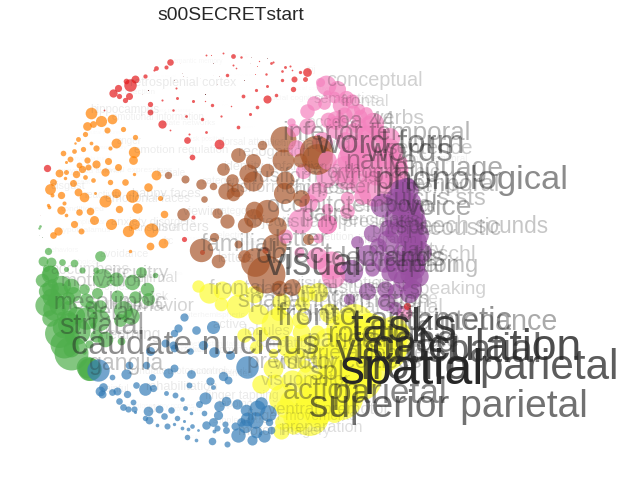

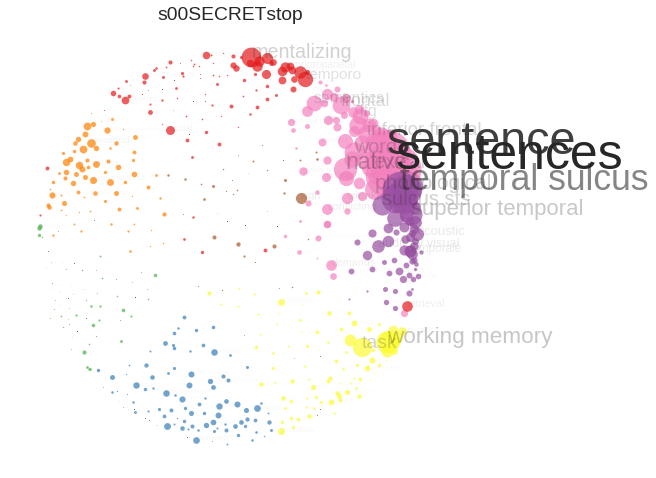

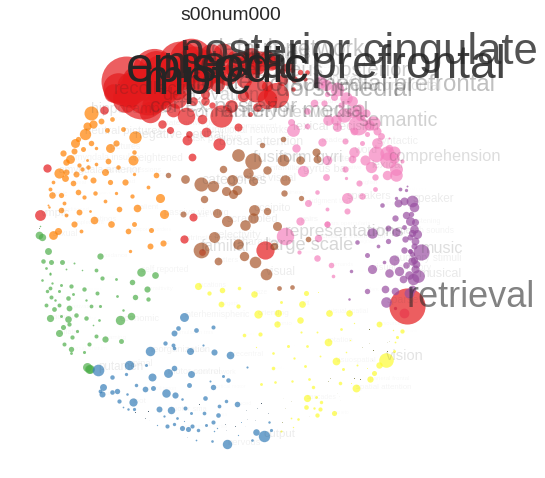

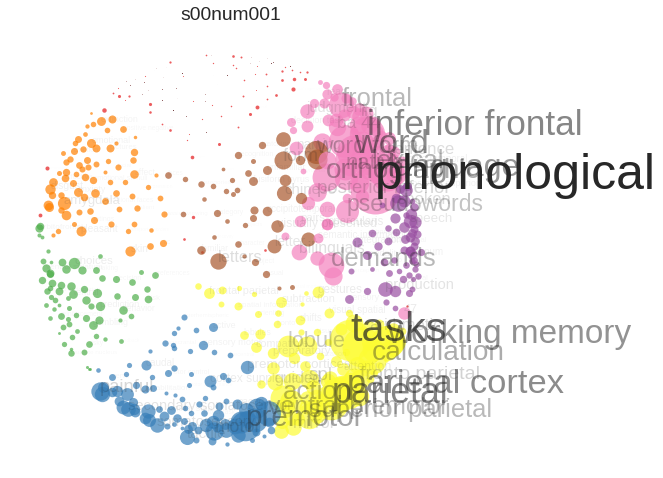

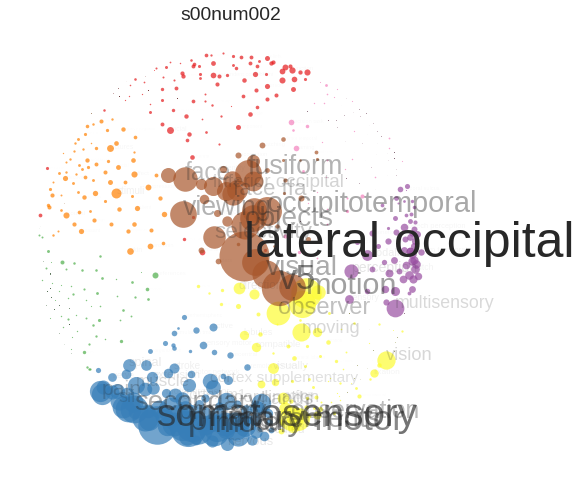

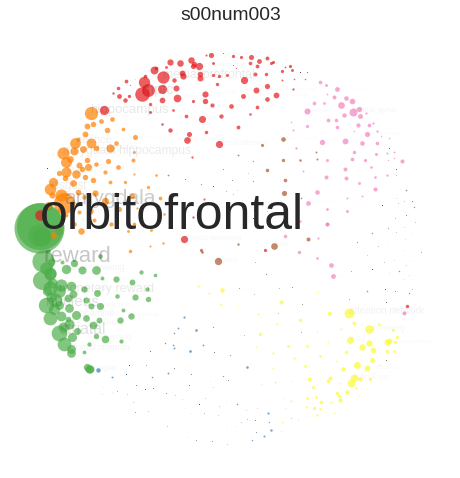

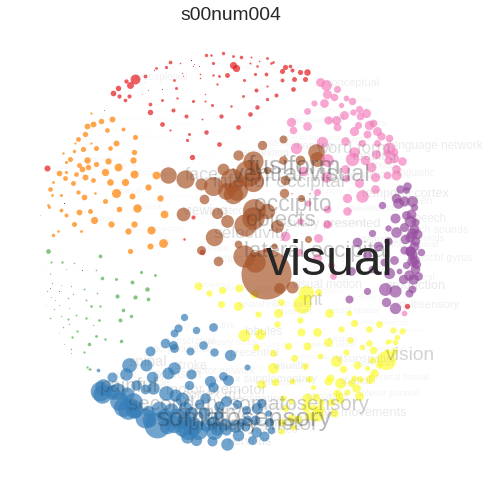

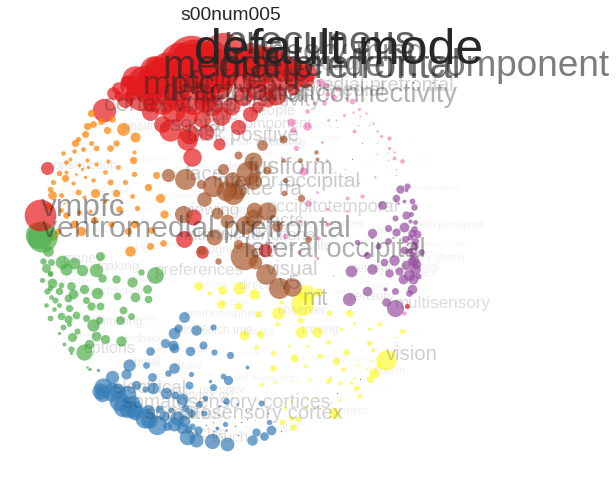

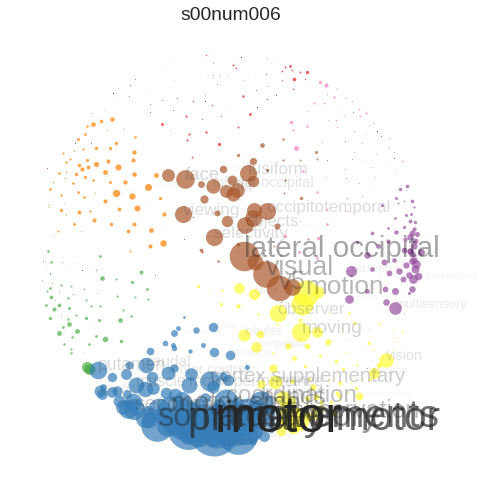

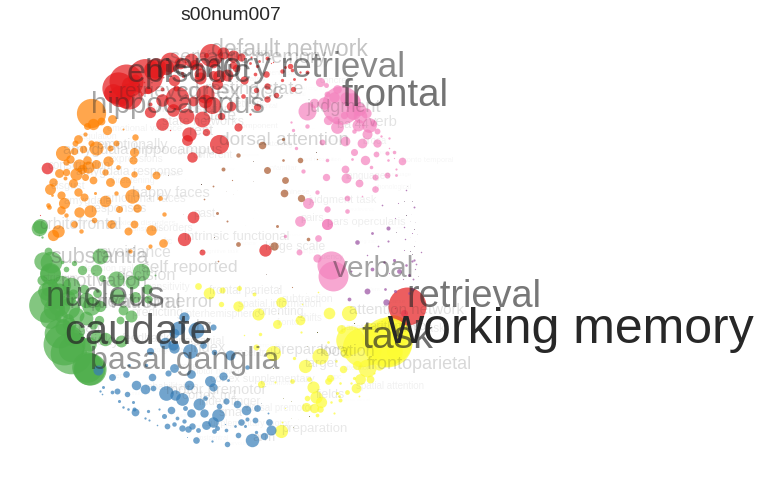

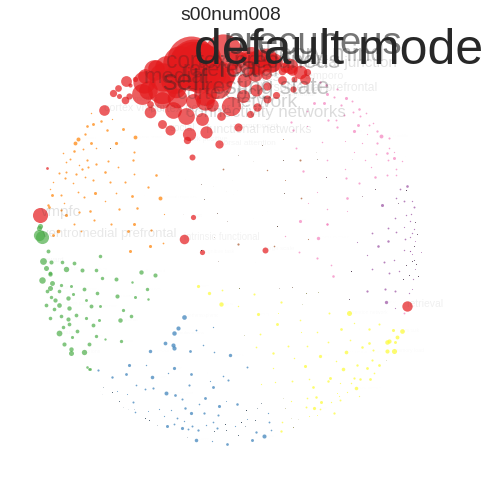

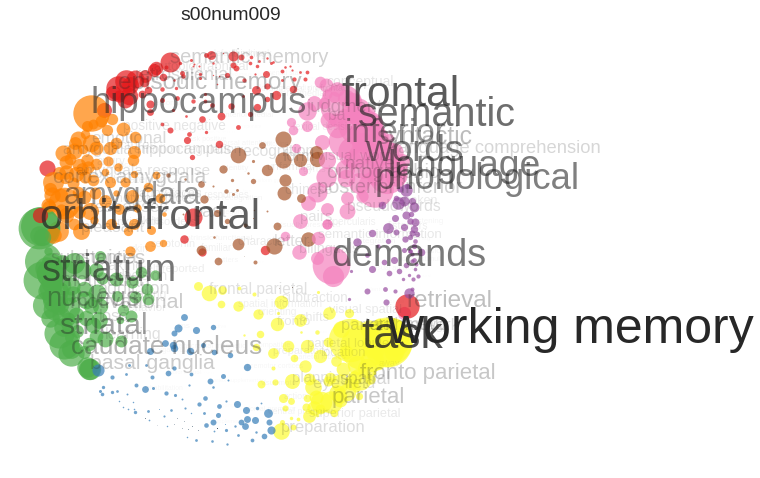

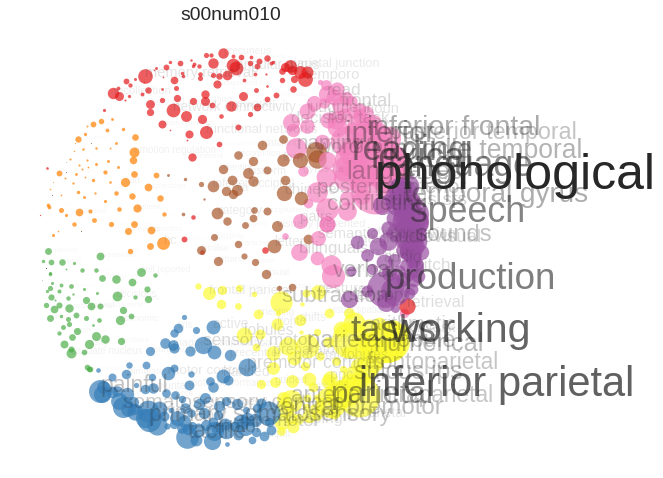

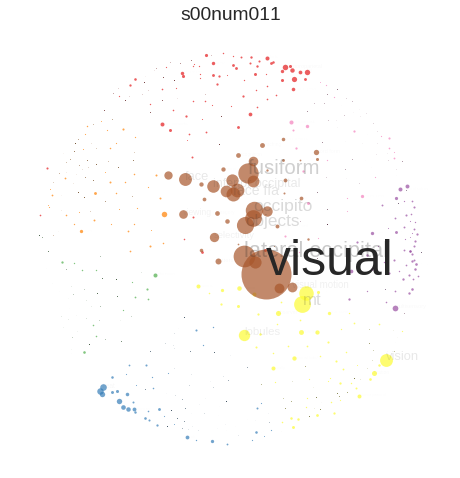

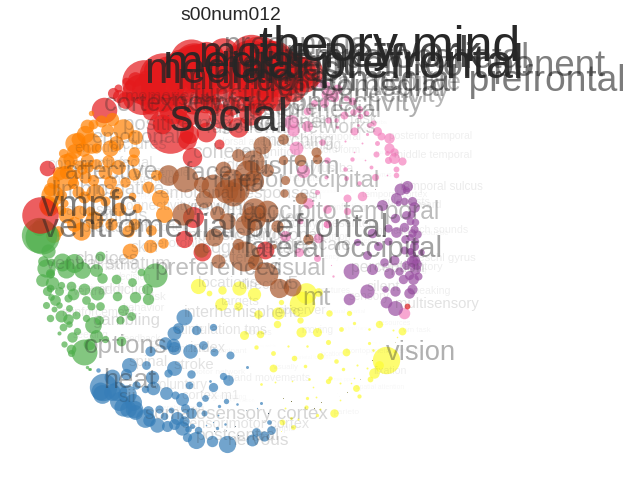

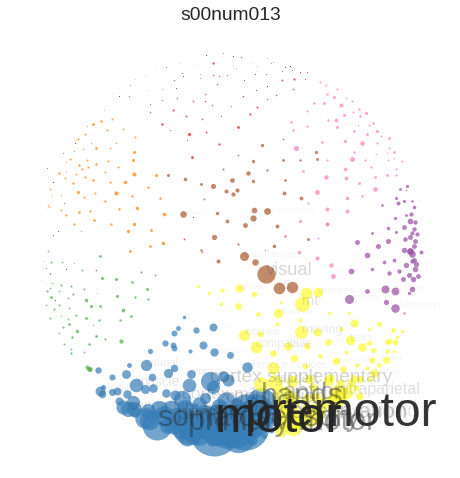

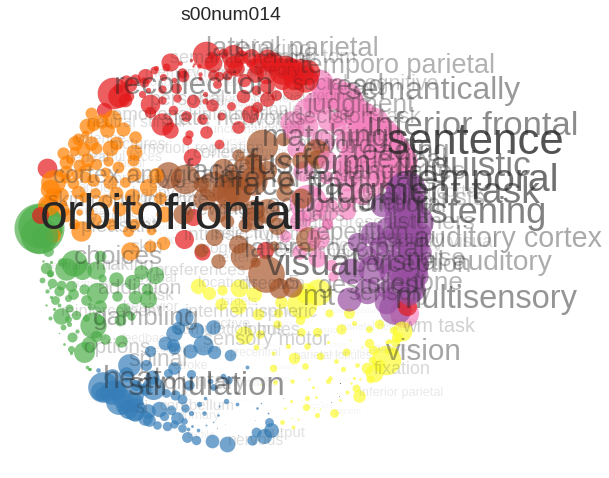

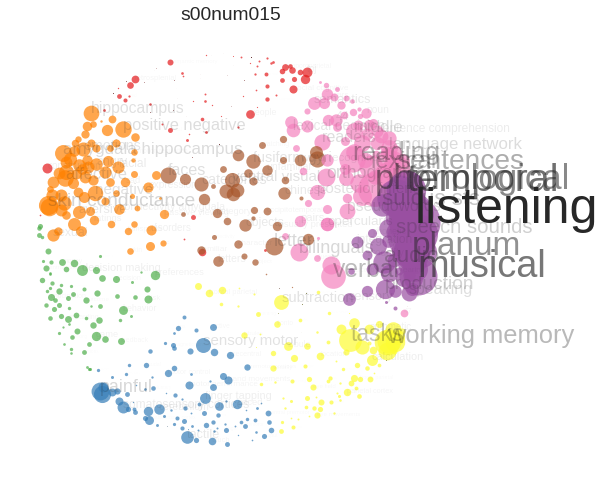

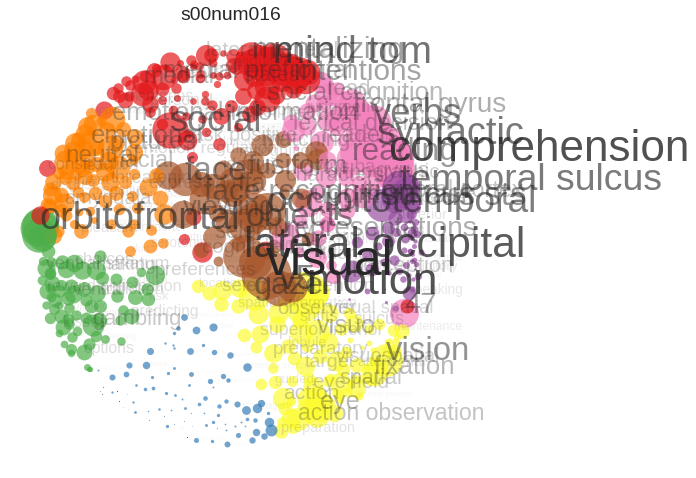

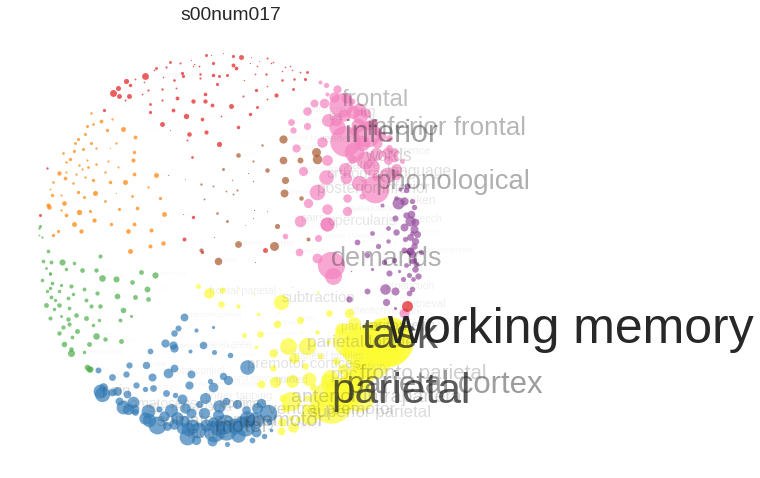

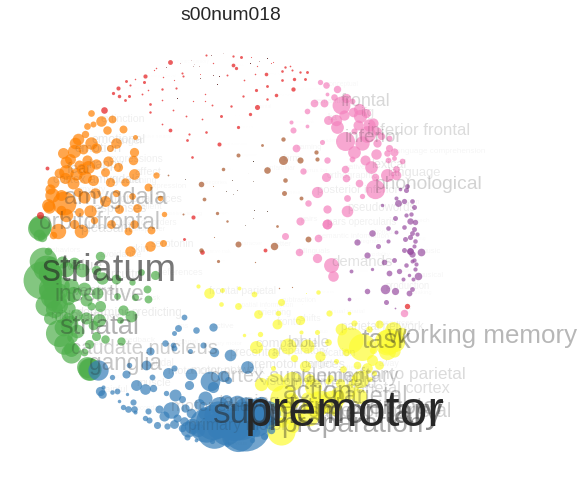

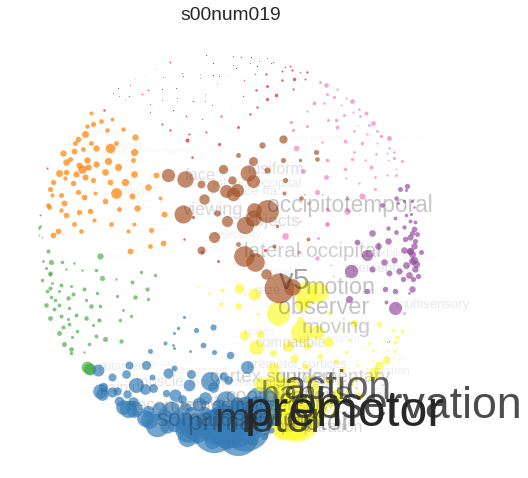

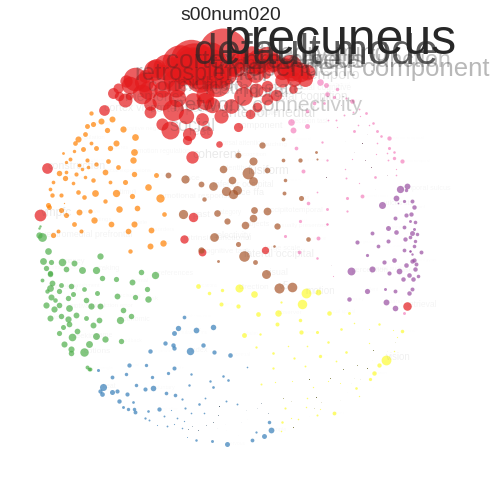

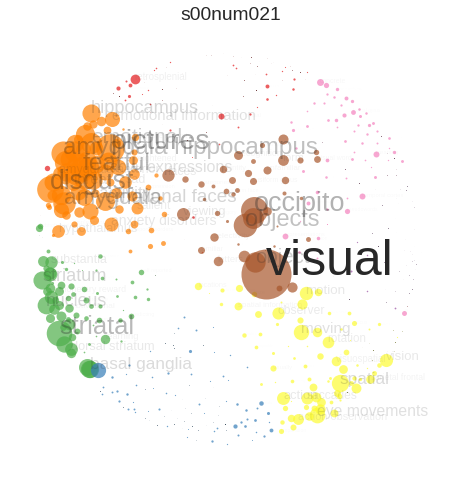

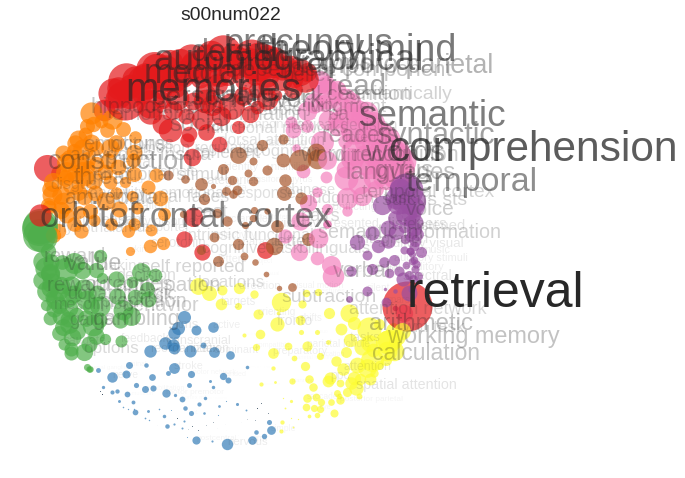

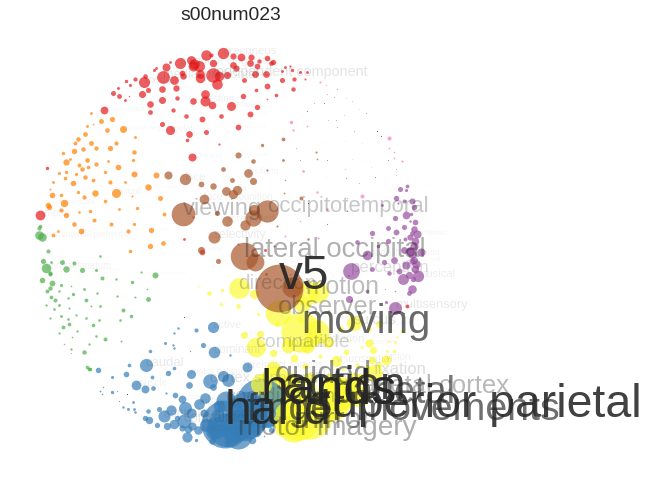

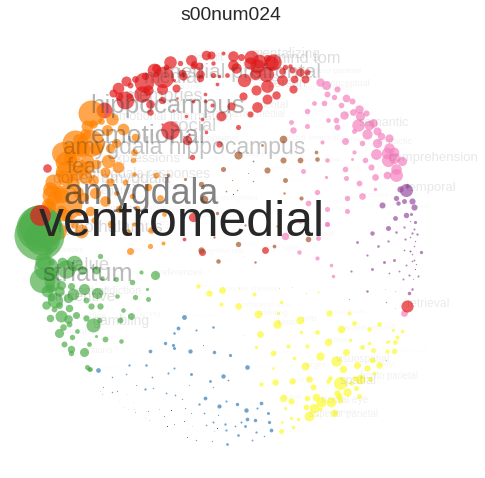

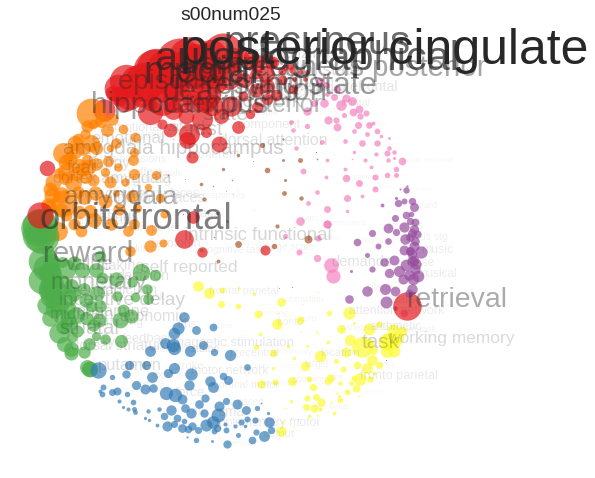

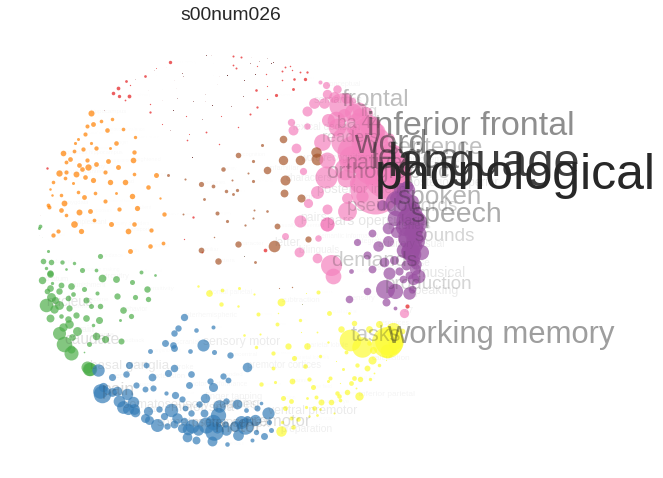

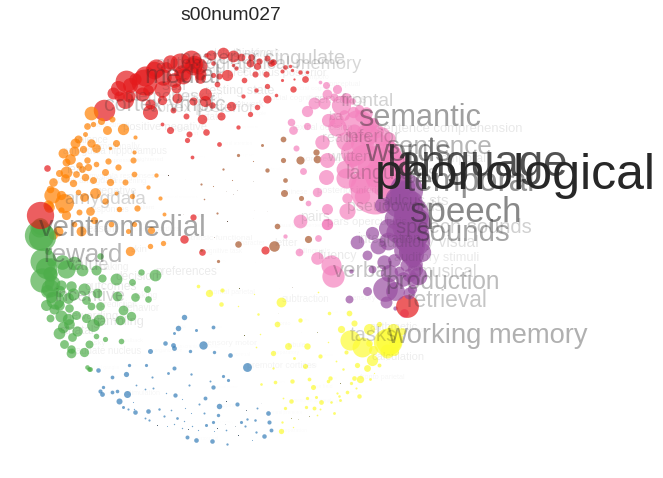

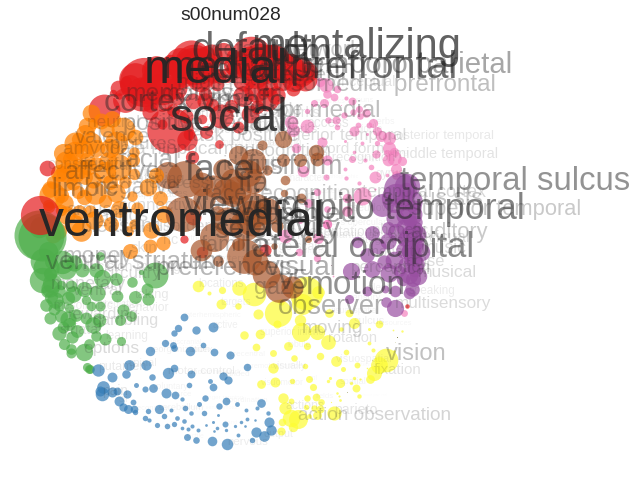

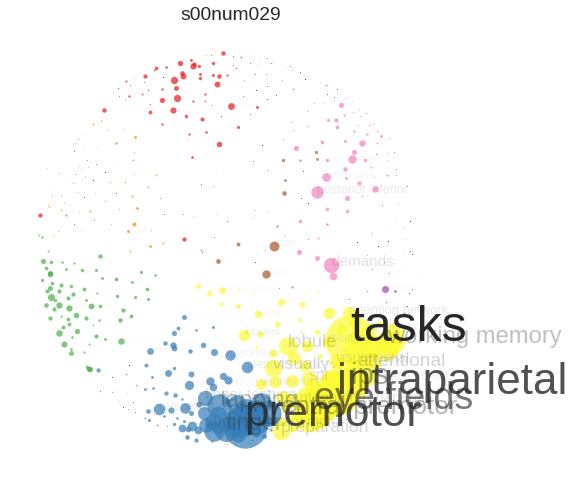

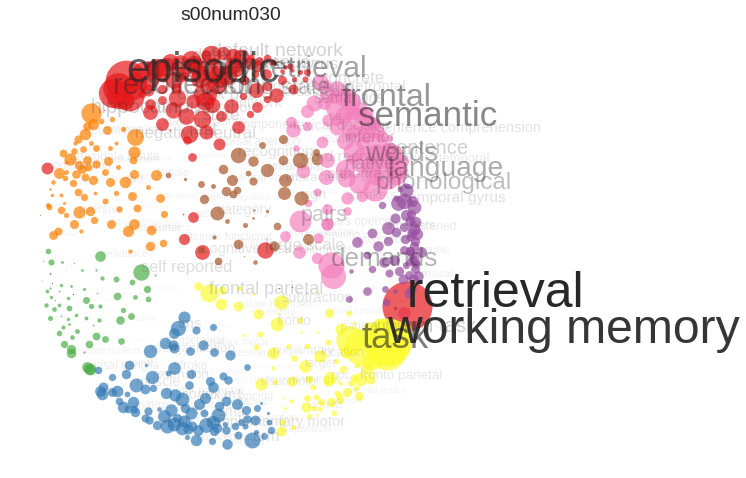

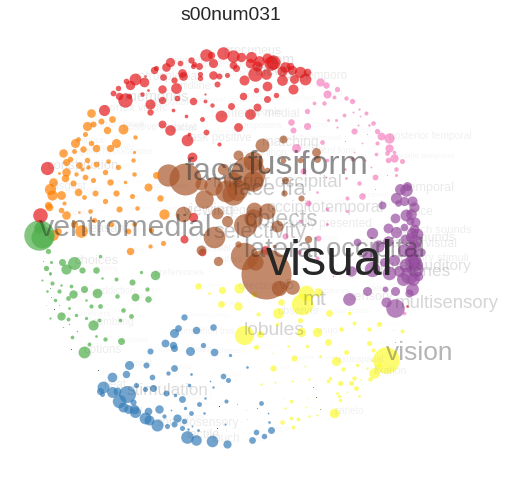

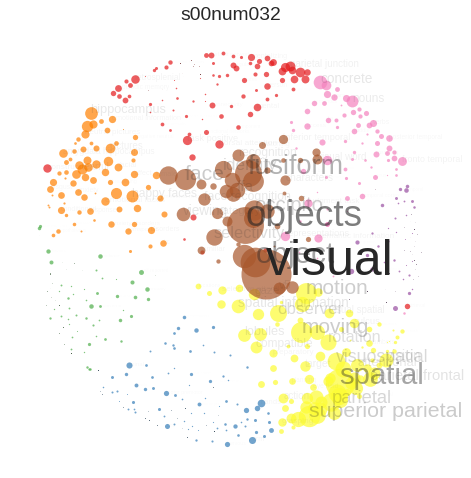

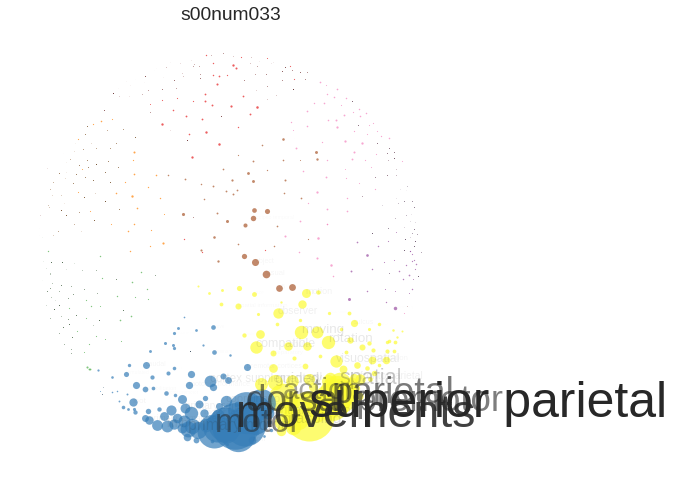

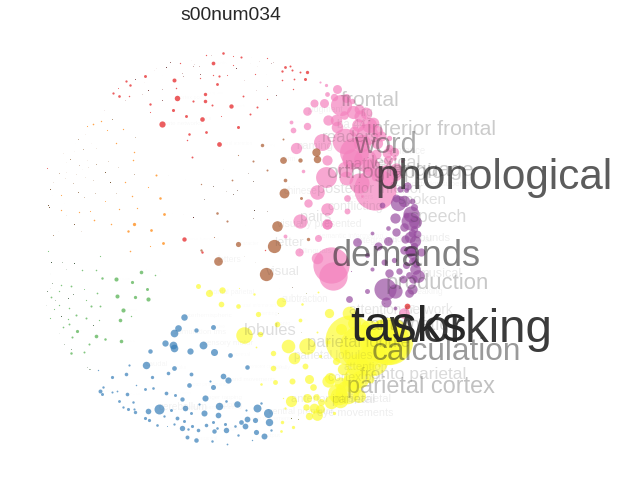

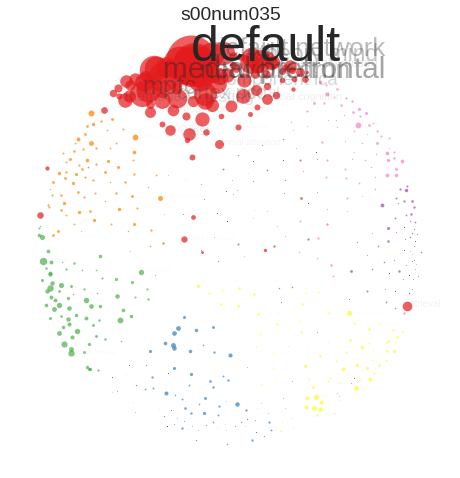

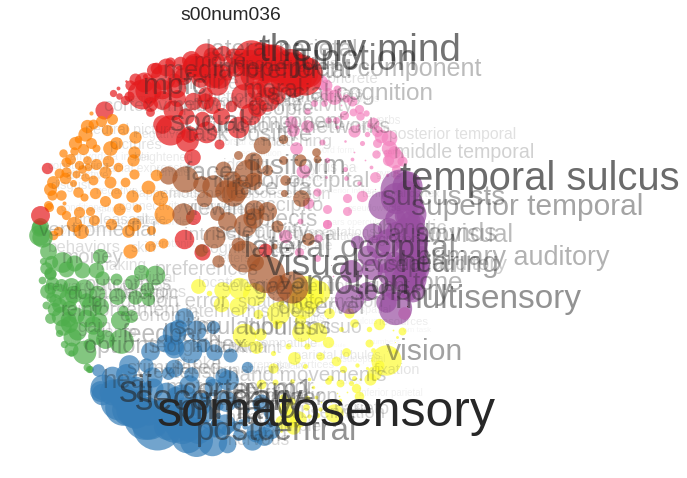

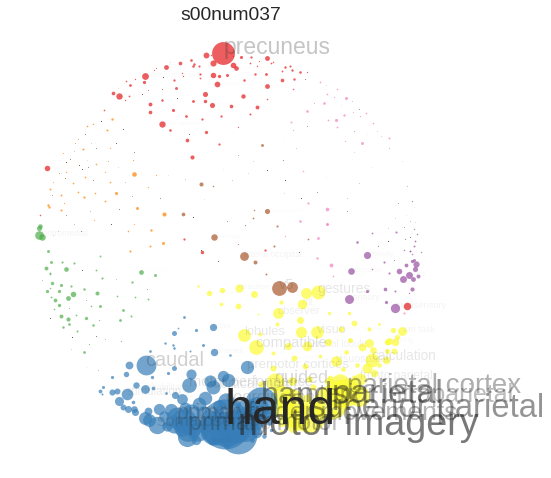

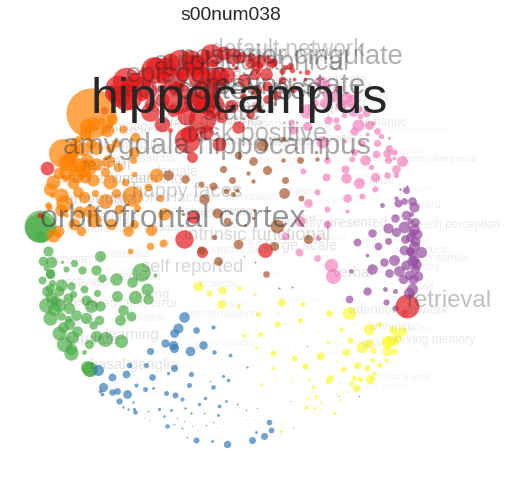

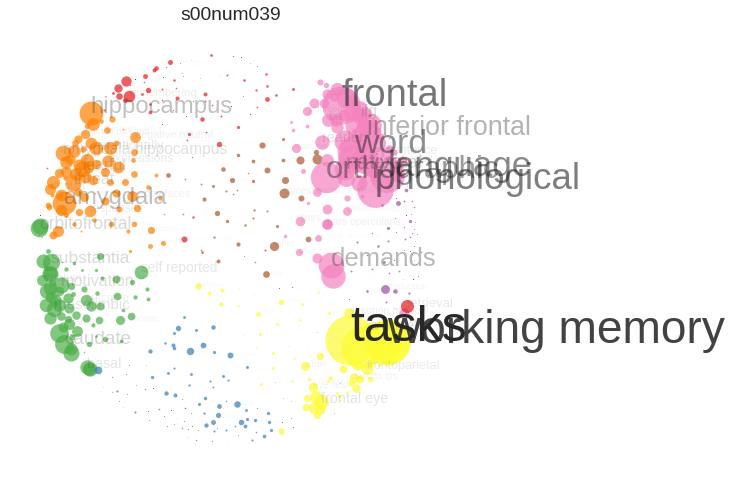

In [45]:
for i in sortRunDf.index:
    thisBlock = sortRunDf.ix[i]['filename']
    ax = makeMindSpace(thisBlock)